In [1]:
import numpy as np
np.set_printoptions(precision=3)
np.random.seed(20221110)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Statistics

Science of estimating population probabilities, means, variances, based on finite samples from the population.

Statistics can be:

    1. Descriptive (sampling, organizin, plotting and calculatins statistics from the samples)
    2. Inferential (fitting models to the data, calculating correlations, infering and predicting by interpolating and extrapolating)
    
Let's start with a simple sample, and do some descriptive statistics.

A runner runs several miles per day. Let's sample 22 days of running and record how many miles the runner runs.
Here's an example of frequencies of miles run in a day. The runner never ran more than 5 miles per day.

|miles|1|2|3|4|5|
|-|-|-|-|-|-|
|freq. |2|3|8|7|2|
|rel. freq.|2/22|3/22|8/22|7/22|2/22|

Total number $n=\sum_{i=1}^{5}f_i$

Relative frequency $Rf_i=\frac{f_i}{n}$
    


Text(0, 0.5, 'frequency')

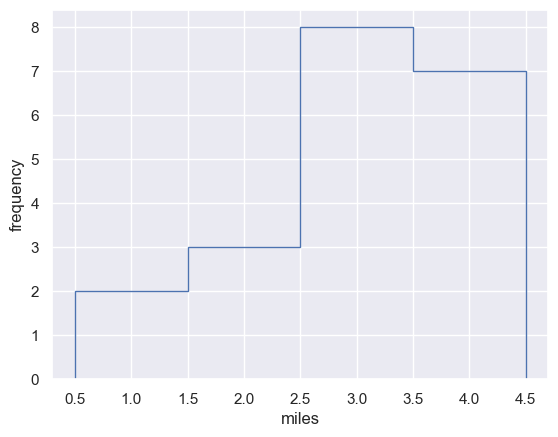

In [2]:
data=[1,1,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,5,5]
plt.hist(data, bins = np.arange(1,6)-0.5, density=False, histtype='step')
plt.xlabel('miles')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

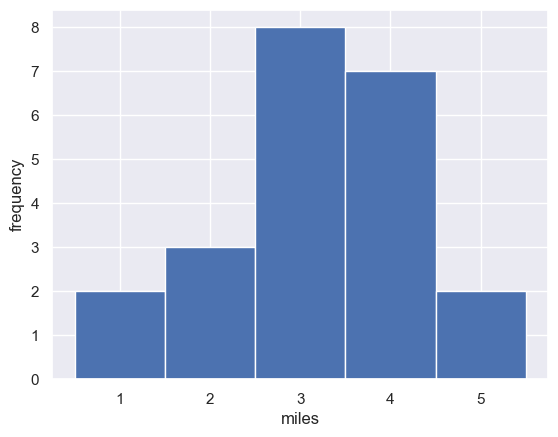

In [3]:
plt.hist(data, bins = np.arange(1,7)-0.5, density=False, histtype='bar')
plt.xlabel('miles')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

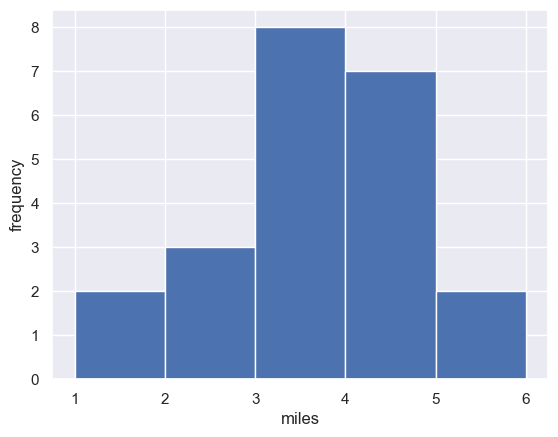

In [4]:
plt.hist(data, bins = np.arange(1,7), density=False, histtype='bar')
plt.xlabel('miles')
plt.ylabel('frequency')

(array([2., 3., 8., 7., 2.]),
 array([1, 2, 3, 4, 5, 6]),
 <BarContainer object of 5 artists>)

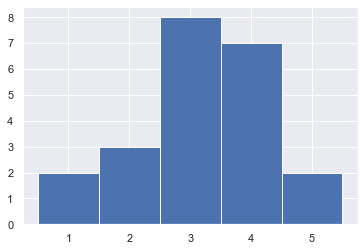

In [26]:
plt.hist(data, bins = np.arange(1,7), density=False, histtype='bar', align='left')
plt.xlabel('miles')
plt.ylabel('frequency')

(array([2., 3., 8., 7., 2.]),
 array([1, 2, 3, 4, 5, 6]),
 <BarContainer object of 5 artists>)

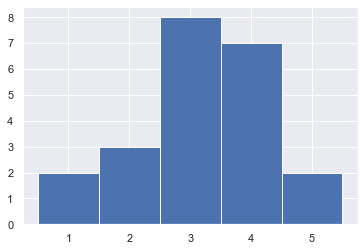

In [29]:
miles=[1,2,3,4,5]
freq=[2,3,8,7,2]
plt.hist(miles, weights=freq, bins = np.arange(1,7), density=False, histtype='bar', align='left')
plt.xlabel('miles')
plt.ylabel('frequency')

freq= [2 3 8 7 2]
miles= [1 2 3 4 5 6]


(array([2., 3., 8., 7., 2.]),
 array([1, 2, 3, 4, 5, 6]),
 <BarContainer object of 5 artists>)

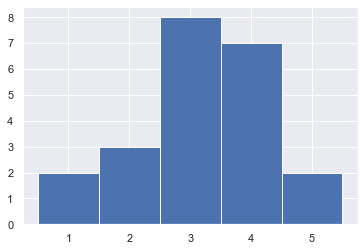

In [39]:
#How to get binned data?
freq, miles=np.histogram(data,bins = np.arange(1,7))
print('freq=',freq)
print('miles=',miles)

plt.hist(miles[:-1], weights=freq, bins = np.arange(1,7), density=False, histtype='bar', align='left')
plt.xlabel('miles')
plt.ylabel('frequency')

Text(0, 0.5, 'cumulative frequency')

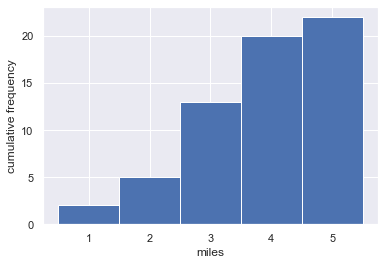

In [47]:
#Cumulative distribution
plt.hist(data, bins = np.arange(1,7), density=False, histtype='bar', align='left',cumulative=True)
plt.xlabel('miles')
plt.ylabel('cumulative frequency')

Cumulative distribution is sum of all frequencies for values smaller than the current one.

|miles|1|2|3|4|5|
|-|-|-|-|-|-|
|freq. |2|3|8|7|2|
|c. freq.|2|5|13|20|22|

Text(0, 0.5, 'cumulative relative frequency')

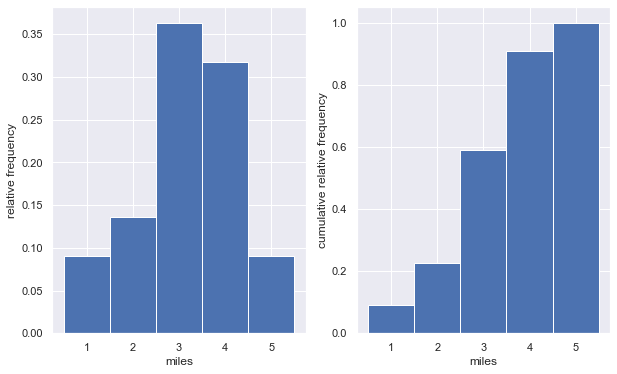

In [55]:
#Relative frequencies, empirical probabilities. Why empirical?
#Cumulative distribution (also called Ogive, if plotted bit differently)
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
ax1.hist(data, bins = np.arange(1,7), density=True, histtype='bar', align='left',cumulative=False)
ax2.hist(data, bins = np.arange(1,7), density=True, histtype='bar', align='left',cumulative=True)
ax1.set_xlabel('miles')
ax1.set_ylabel('relative frequency')
ax2.set_xlabel('miles')
ax2.set_ylabel('cumulative relative frequency')



#Note that the last point on the C.R.F. distribution is at 1.0

# Mean, variance, standard deviation

## Population parameter(s)

Population $\bf{size}$, sum of frequencies:

$N=\sum_{i}f_i$

Population $\bf{mean}$ of a variable $x$:

$<x>=\frac{\sum_if_ix_i}{N}$

define the probability $p_i=\frac{f_i}{N}$, then:

$<x>=\sum_i p_ix_i$

Population $\bf{variance}$, a measure of spread of the data:

$\sigma^2=<(x-<x>)^2>$

or

$\sigma^2=\frac{\sum_{j=1}^{N}(x_j-<x>)^2}{N}$

We can simplify this:

$\sigma^2=<(x-<x>)^2>=<x^2-2x<x>+<x>^2>=<x^2>-2<x><x>+<x>^2$

$\sigma^2=<x^2>-<x>^2$

Population $\bf{standard}$ $\bf{deviation}$:

$\sigma=\sqrt{\sigma^2}$




In [59]:
#We can easily calculate them
mean=np.mean(data)
standard_dev=np.std(data)

print("Population Mean = ",mean)
print("Population Std = ",standard_dev)


Population Mean =  3.1818181818181817
Population Std =  1.0718023747774177


## Sample statistic(s)

A statistic is a sample estimate of a population parameter. 

Sample $\bf{size}$, sum of frequencies:

$n=\sum_{i}f_i$ (lower case n)

Sample $\bf{mean}$ of a variable $x$:

$\bar{x}=\frac{\sum_if_ix_i}{n}$

define the $\bf{empirical}$ probability $p_i=\frac{f_i}{n}$, then:

$\bar{x}=\sum_i p_ix_i$

Sample $\bf{variance}$, a measure of spread of the sample data:


$s^2=\frac{\sum_{j=1}^{n}(x_j-\bar{x})^2}{n-1}$

Note that here we divide by $n-1$, not $n$. This is because we introduced a bias in the data with $\bar{x}$.
We have one constraint that we impose on the data. Turns out, this is a better estimate of the population $\sigma^2$.
In general we divide with $n-ddof$, where $ddof$ is the delta degrees of freedom, number of constraints. 

Sample $\bf{standard}$ $\bf{deviation}$:

$s=\sqrt{s^2}$



In [61]:
#We can get these with the same NumPy functions
sample_mean=np.mean(data)
sample_standard_dev=np.std(data, ddof=1)

print("Sample Mean = ",sample_mean)
print("Sample Std = ",sample_standard_dev)

Sample Mean =  3.1818181818181817
Sample Std =  1.0970247050377686


In [8]:
#But also the statistics library has practically all of the basic statistics functionality
import statistics as stat
pop_mean=stat.mean(data)
pop_std=stat.pstdev(data)

sample_std=stat.stdev(data)

print("Population mean is ",pop_mean)
print("Population standard deviation is ",pop_std)
print("Sample standard deviation is ", sample_std)

#Note that standard deviation in the statistics library is the sample one by default

Population mean is  3.1818181818181817
Population standard deviation is  1.0718023747774177
Sample standard deviation is  1.0970247050377686
